In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_path = 'raw_data/ChargingRecords.csv'
df = pd.read_csv(data_path)

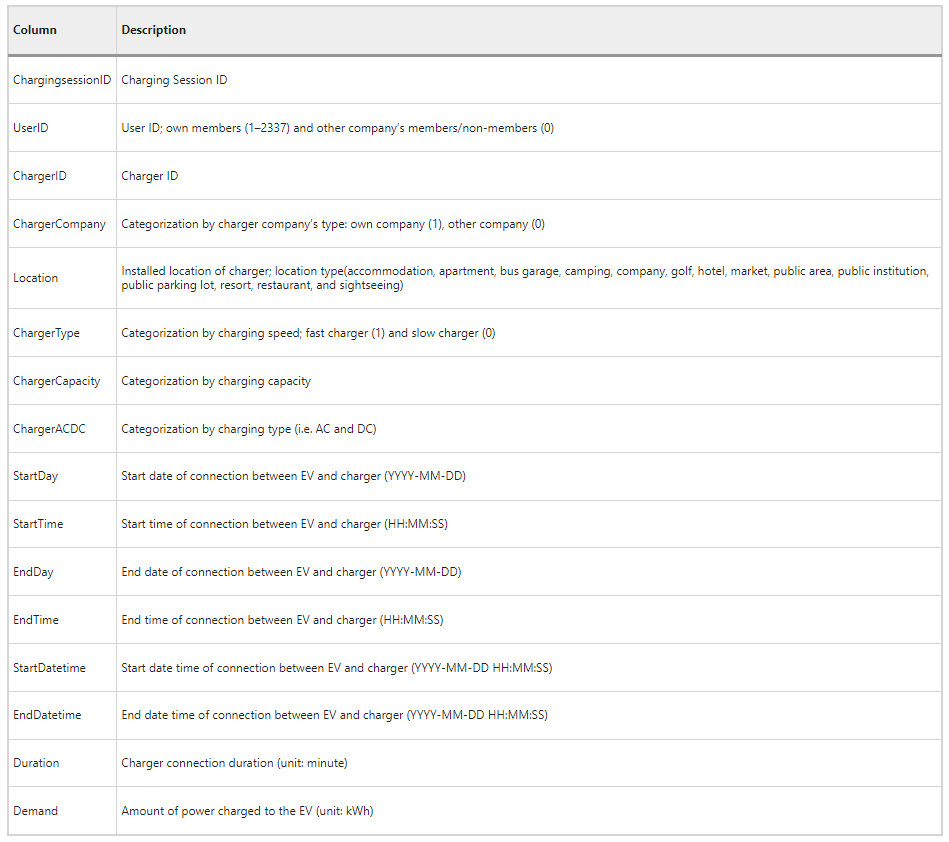

In [3]:
print(df.shape)
df.head().T

(72856, 13)


,0,1,2,3,4
UserID,0,0,0,0,0
ChargerID,1,1,1,1,1
ChargerCompany,1,1,1,1,1
Location,hotel,hotel,hotel,hotel,hotel
ChargerType,0,0,0,0,0
StartDay,2022-09-15,2022-09-14,2022-09-14,2022-09-29,2022-09-25
StartTime,20:54:02,20:01:05,18:54:30,18:32:51,19:30:15
EndDay,2022-09-15,2022-09-14,2022-09-14,2022-09-30,2022-09-26
EndTime,23:59:13,21:31:04,19:54:29,0:16:42,0:30:14
StartDatetime,2022-09-15 20:54,2022-09-14 20:01,2022-09-14 18:54,2022-09-29 18:32,2022-09-25 19:30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72856 entries, 0 to 72855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          72856 non-null  int64  
 1   ChargerID       72856 non-null  int64  
 2   ChargerCompany  72856 non-null  int64  
 3   Location        72856 non-null  object 
 4   ChargerType     72856 non-null  int64  
 5   StartDay        72856 non-null  object 
 6   StartTime       72856 non-null  object 
 7   EndDay          72856 non-null  object 
 8   EndTime         72856 non-null  object 
 9   StartDatetime   72856 non-null  object 
 10  EndDatetime     72856 non-null  object 
 11  Duration        72856 non-null  int64  
 12  Demand          72856 non-null  float64
dtypes: float64(1), int64(5), object(7)
memory usage: 7.2+ MB


No hay valores NaN

In [5]:
df.isna().sum().sort_values(ascending=False)

UserID            0
ChargerID         0
ChargerCompany    0
Location          0
ChargerType       0
StartDay          0
StartTime         0
EndDay            0
EndTime           0
StartDatetime     0
EndDatetime       0
Duration          0
Demand            0
dtype: int64

Segregamos por localizacion? 

In [7]:
df['Location'].unique()

array(['hotel', 'company', 'apartment', 'resort', 'public area',
       'public institution', 'restaurant', 'accommodation', 'golf',
       'sightseeing', 'market', 'camping', 'public parking lot',
       'bus garage'], dtype=object)

In [6]:
df.groupby('Location').size().reset_index(name='Counts')

,Location,Counts
0,accommodation,187
1,apartment,14038
2,bus garage,29
3,camping,1630
4,company,7558
5,golf,1029
6,hotel,8600
7,market,3005
8,public area,14082
9,public institution,7023


In [15]:
session_counts = df.groupby('Location').size().reset_index(name='session_count')
charger_counts = df.groupby('Location')['ChargerID'].nunique().reset_index(name='charger_count')
location_summary = pd.merge(session_counts, charger_counts, on='Location')
print(location_summary)

              Location  session_count  charger_count
0        accommodation            187              2
1            apartment          14038            281
2           bus garage             29              7
3              camping           1630              8
4              company           7558            141
5                 golf           1029             24
6                hotel           8600            133
7               market           3005            106
8          public area          14082            437
9   public institution           7023            402
10  public parking lot           3396            205
11              resort           8854            138
12          restaurant           2222            117
13         sightseeing           1203            118


In [8]:
df['ChargerCompany'].unique()

array([1, 0], dtype=int64)

In [9]:
df.groupby('ChargerCompany').size().reset_index(name='Counts')

,ChargerCompany,Counts
0,0,27143
1,1,45713


Per realitzar el estudi necesitem tenir la demanda horaria 

In [16]:
df.head()

,UserID,ChargerID,ChargerCompany,Location,ChargerType,StartDay,StartTime,EndDay,EndTime,StartDatetime,EndDatetime,Duration,Demand
0,0,1,1,hotel,0,2022-09-15,20:54:02,2022-09-15,23:59:13,2022-09-15 20:54,2022-09-15 23:59,185,20.36
1,0,1,1,hotel,0,2022-09-14,20:01:05,2022-09-14,21:31:04,2022-09-14 20:01,2022-09-14 21:31,90,10.19
2,0,1,1,hotel,0,2022-09-14,18:54:30,2022-09-14,19:54:29,2022-09-14 18:54,2022-09-14 19:54,60,6.78
3,0,1,1,hotel,0,2022-09-29,18:32:51,2022-09-30,0:16:42,2022-09-29 18:32,2022-09-30 0:16,344,37.65
4,0,1,1,hotel,0,2022-09-25,19:30:15,2022-09-26,0:30:14,2022-09-25 19:30,2022-09-26 0:30,300,33.81


In [9]:
df['Duration'].sort_values()

55422     -29
63504     -24
55457     -21
55464     -20
65029     -16
         ... 
70764    1413
62961    1413
67764    1431
69536    1439
30131    1573
Name: Duration, Length: 72856, dtype: int64

We spot some negative values so we filter the df to avoid negative values

In [28]:
df = df[df['Duration'] > 0]

In [29]:
df.shape

(72121, 13)

In [30]:
# Pasar las columnas string a formato datetime
df['StartDatetime'] = pd.to_datetime(df['StartDatetime'])
df['EndDatetime'] = pd.to_datetime(df['EndDatetime'])

#Pasar la columna Duration de min a h
df['Duration'] = df['Duration']/60

# Seleccionamos las columnas necesarias
df = df[['StartDatetime', 'EndDatetime', 'Demand', 'Duration']]

# Calcular la potencia media de la sesión
df['medPower'] = df['Demand'] / df['Duration']

In [31]:
df['medPower'].sort_values()

1505        0.000534
1495        0.001813
1549        0.002222
9139        0.002752
1477        0.002993
            ...     
55456     614.160000
55133     675.600000
63501     822.750000
12039     872.100000
55423    1657.800000
Name: medPower, Length: 72121, dtype: float64

In [34]:
# Crear un datetimeindex
date_series_d = pd.date_range(start=df['StartDatetime'].min(), end=df['EndDatetime'].max(), freq="1d")

# Inicializar listas para almacenar resultados
val_sessions = []
val_total_power = []

# Iterar sobre cada franja horaria
for date in date_series_d:
    # Filtrar sesiones que están activas en la franja horaria actual
    active_sessions = df[(df['StartDatetime'] <= date) & (df['EndDatetime'] >= date)]
    
    # Calcular los valores necesarios
    session_count = active_sessions.shape[0]
    total_power = active_sessions['medPower'].sum()
    
    # Almacenar los resultados
    val_sessions.append(session_count)
    val_total_power.append(total_power)

# Crear el nuevo dataframe
final_d = pd.DataFrame({
    'date': date_series_d,
    'val_sessions': val_sessions,
    'val_total_power': val_total_power
})

In [35]:
final_d.shape

(366, 3)

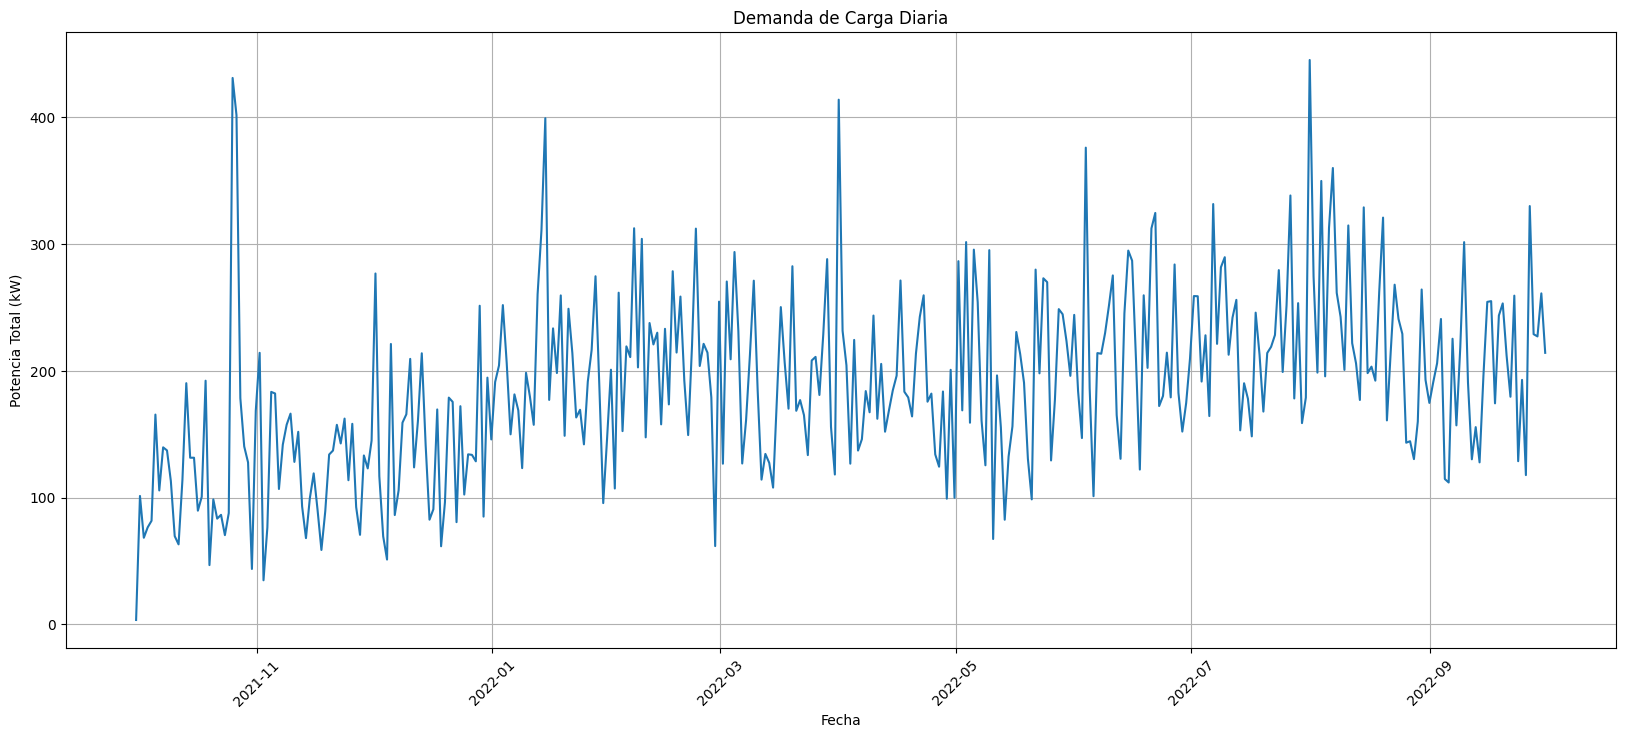

In [37]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='val_total_power', data=final_d)
plt.title('Demanda de Carga Diaria')
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
# Crear un datetimeindex
date_series_h = pd.date_range(start=df['StartDatetime'].min(), end=df['EndDatetime'].max(), freq="1h")

val_sessions = []
val_total_power = []

for date in date_series_h:
    # Filtrar sesiones que están activas en la franja horaria actual
    active_sessions = df[(df['StartDatetime'] <= date) & (df['EndDatetime'] >= date)]
    
    # Calcular los valores necesarios
    session_count = active_sessions.shape[0]
    total_power = active_sessions['medPower'].sum()
    
    # Almacenar los resultados
    val_sessions.append(session_count)
    val_total_power.append(total_power)

# Crear el nuevo dataframe
final_h = pd.DataFrame({
    'date': date_series_h,
    'val_sessions': val_sessions,
    'val_total_power': val_total_power
})

In [39]:
final_h.shape

(8767, 3)

In [40]:
final_h.head()

,date,val_sessions,val_total_power
0,2021-09-30 17:14:00,1,3.410267
1,2021-09-30 18:14:00,1,3.410267
2,2021-09-30 19:14:00,3,16.978766
3,2021-09-30 20:14:00,4,23.708134
4,2021-09-30 21:14:00,7,44.358227


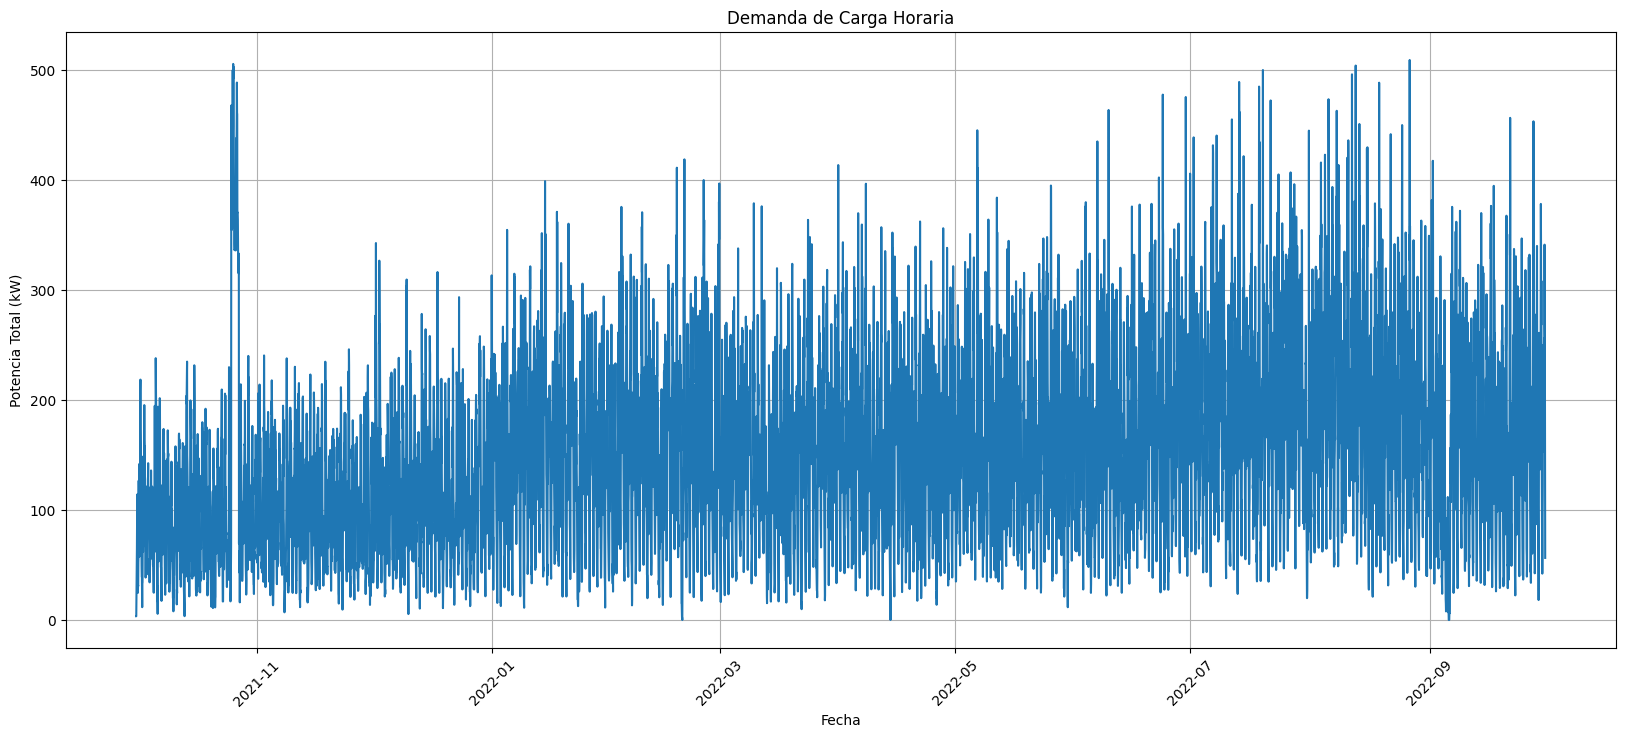

In [41]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='val_total_power', data=final_h)
plt.title('Demanda de Carga Horaria')
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [49]:
final_h.to_csv('./processed_data/data_h.csv', index=False)
final_d.to_csv('./processed_data/data_d.csv', index=False)

Vemos que el 26 de octubre de 2021 hay un pico de demanda
En series temporales los outliers nos se tratan

In [32]:
# Definir fechas de inicio y final
start_date = '2021-10-22'
end_date = '2021-11-01'

# Filtrar el DataFrame por el rango de fechas
filtered_final = final_h[(final_h['date'] >= start_date) & (final_h['date'] <= end_date)]

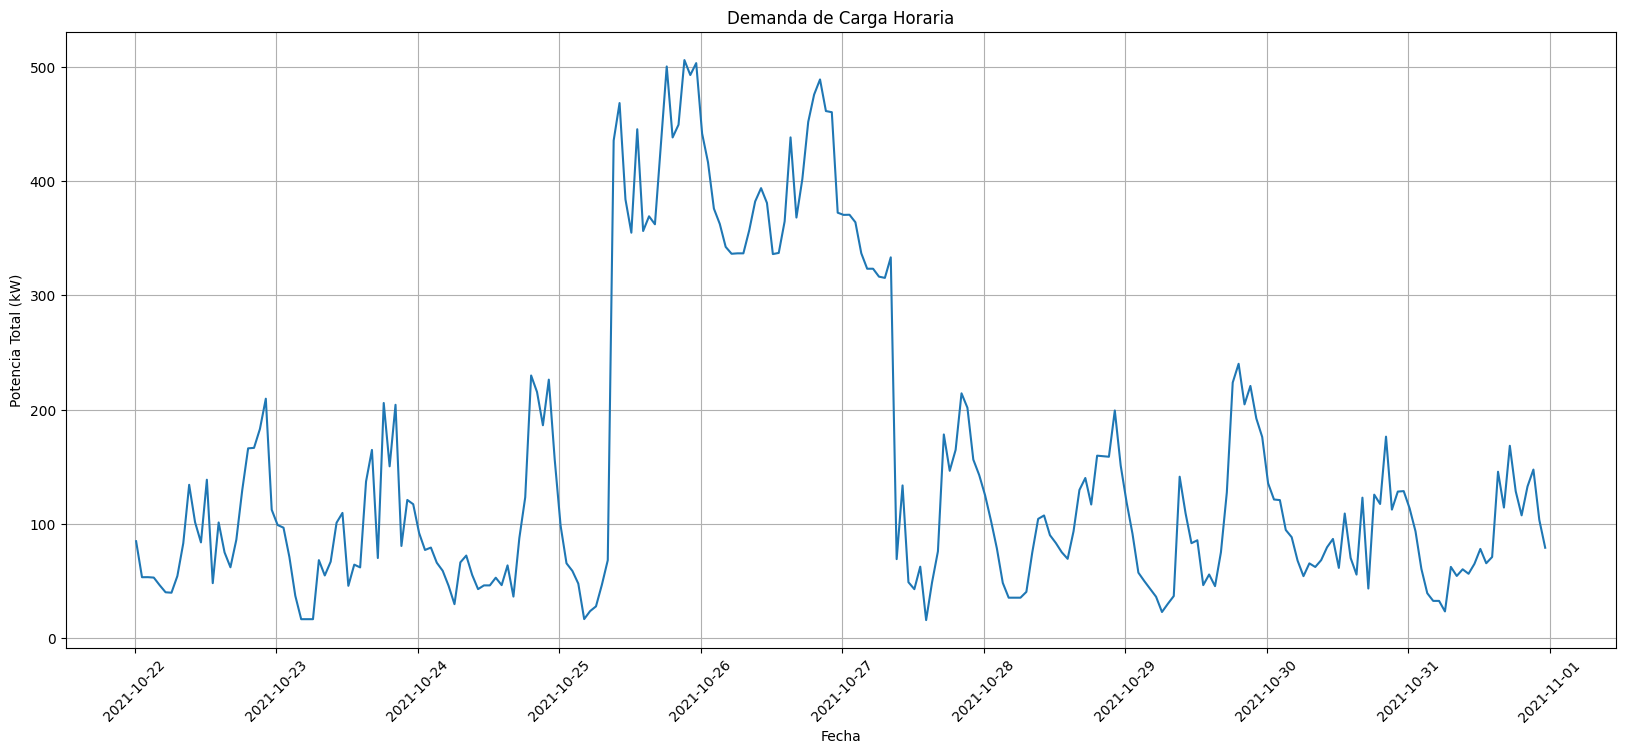

In [33]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='val_total_power', data=filtered_final)
plt.title('Demanda de Carga Horaria')
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
